In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os

In [2]:
# Load data
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

print(f"Train shape: {train_df.shape}")
print(f"Train shape: {test_df.shape}")
print(train_df.head())

Train shape: (25000, 2)
Train shape: (25000, 2)
                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0


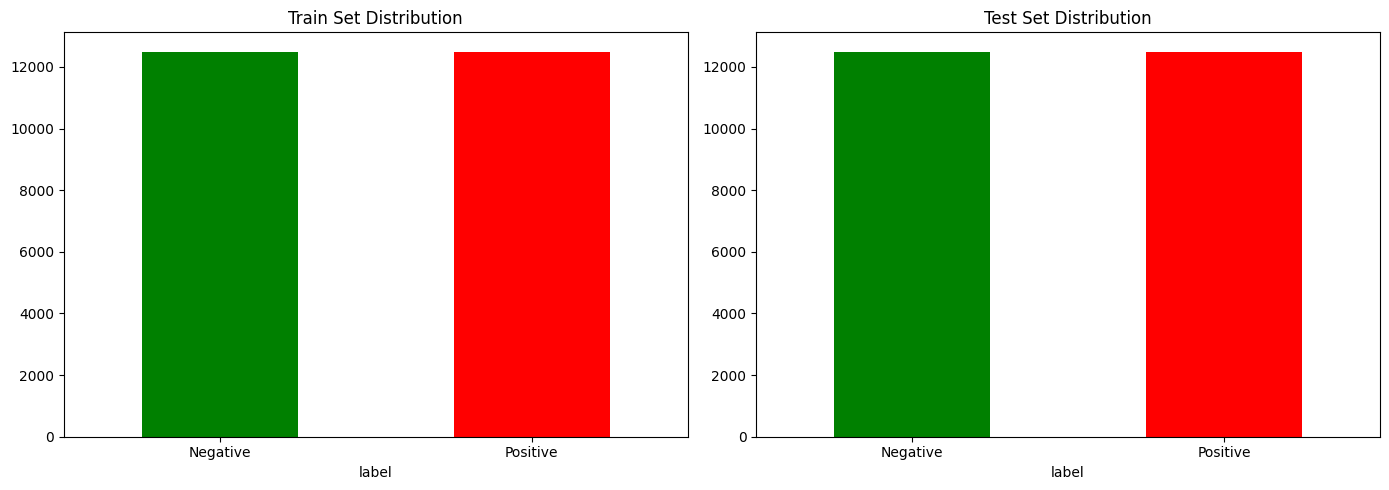

In [3]:
# Class distribution
fig, axes = plt.subplots(1, 2, figsize=(14,5))

train_df['label'].value_counts().plot(kind='bar', ax=axes[0], color=['green','red'])
axes[0].set_title('Train Set Distribution')
axes[0].set_xticklabels(['Negative','Positive'], rotation=0)

test_df['label'].value_counts().plot(kind='bar', ax=axes[1], color=['green','red'])
axes[1].set_title('Test Set Distribution')
axes[1].set_xticklabels(['Negative','Positive'], rotation=0)


plt.tight_layout()
os.makedirs("../figures", exist_ok=True)
plt.savefig("../figures/class_distribution.png")

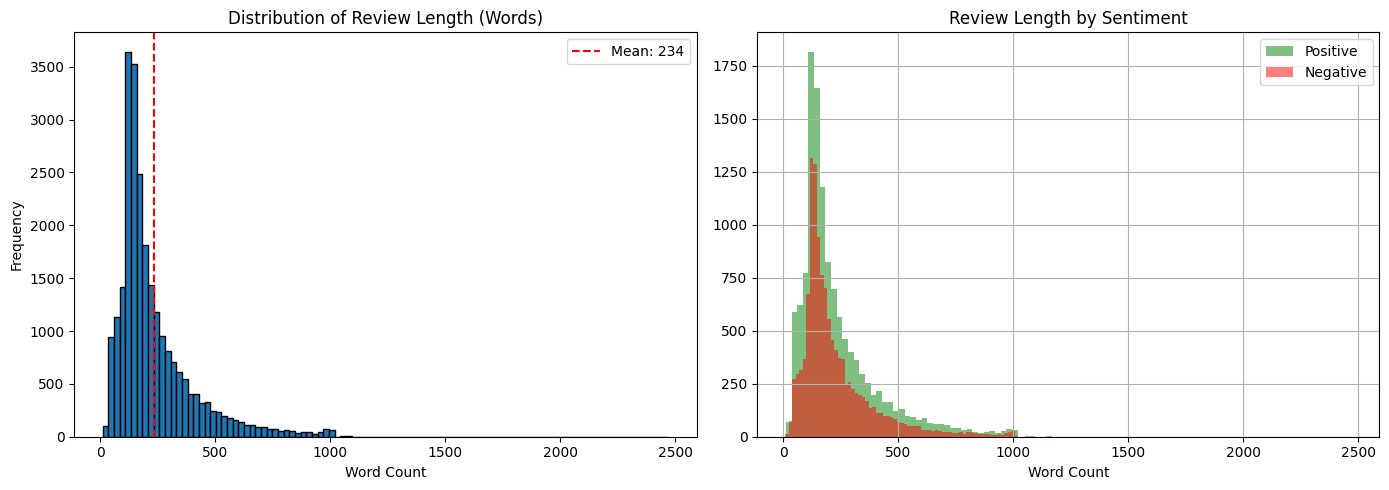

In [4]:
# Review length analysis
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split(" ")))
train_df['char_count'] = train_df['text'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# words
axes[0].hist(train_df['word_count'], bins=100, edgecolor='black')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Review Length (Words)')
axes[0].axvline(train_df['word_count'].mean(), color='red', linestyle='--',
                label=f'Mean: {train_df["word_count"].mean():.0f}')
axes[0].legend()

# By Sentiment
train_df[train_df['label']==1]['word_count'].hist(ax=axes[1], bins=100, alpha=0.5, label='Positive', color='green')
train_df[train_df['label']==0]['word_count'].hist(ax=axes[1], bins=100, alpha=0.5, label='Negative', color='red')
axes[1].set_xlabel('Word Count')
axes[1].set_title('Review Length by Sentiment')
axes[1].legend()

plt.tight_layout()
plt.savefig("../figures/length_distribution.png")

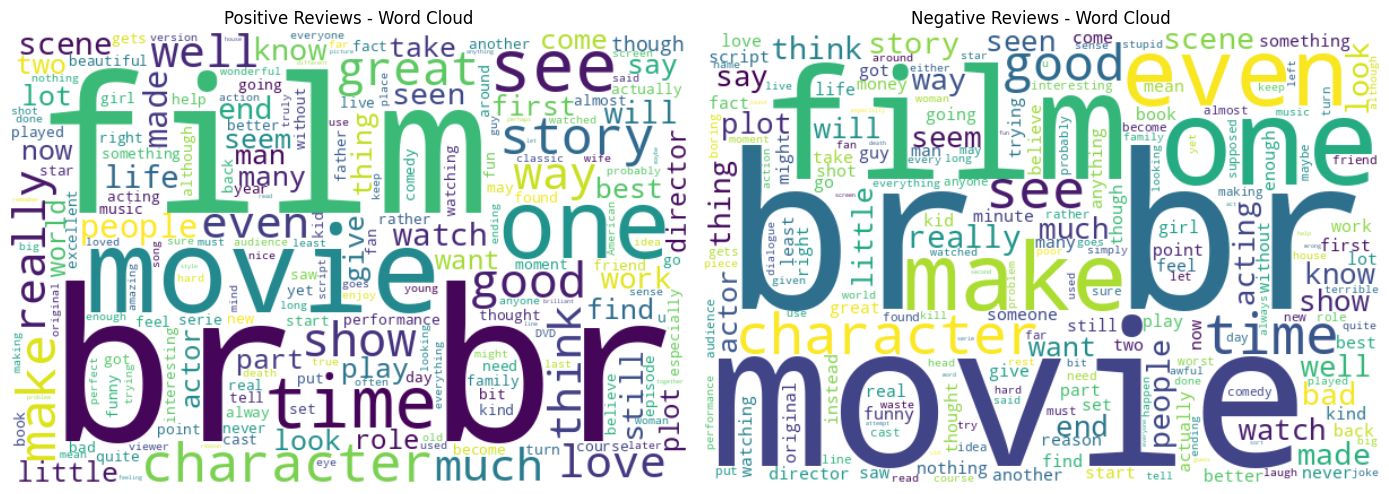

In [9]:
# Most common words
from wordcloud import WordCloud

positive_text = ' '.join(train_df[train_df['label']==1]['text'].tolist())
negative_text = ' '.join(train_df[train_df['label']==0]['text'].tolist())

fig, axes = plt.subplots(1, 2, figsize=(14,6))

wc_pos = WordCloud(width=600, height=400, 
                   background_color='white').generate(positive_text)
axes[0].imshow(wc_pos, interpolation='bilinear')
axes[0].set_title('Positive Reviews - Word Cloud')
axes[0].axis('off')

wc_neg = WordCloud(width=600, height=400, 
                   background_color='white').generate(negative_text)
axes[1].imshow(wc_neg, interpolation='bilinear')
axes[1].set_title('Negative Reviews - Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.savefig("../figures/wordclouds.png")

In [16]:
# Sample Reviews
print("=" * 50)
print("Positive Examples")
print("=" * 50)
for i, row in train_df[train_df['label']==1].head(3).iterrows():
    print(f"\n{row['text'][:300]}...")
print("=" * 50)

print("=" * 50)
print("Negative Examples")
print("=" * 50)
for i, row in train_df[train_df['label']==0].head(3).iterrows():
    print(f"\n{row['text'][:300]}...")
print("=" * 50)

Positive Examples

Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn't really understand, and whose naivety is all the more strik...

Zentropa is the most original movie I've seen in years. If you like unique thrillers that are influenced by film noir, then this is just the right cure for all of those Hollywood summer blockbusters clogging the theaters these days. Von Trier's follow-ups like Breaking the Waves have gotten more acc...

Lars Von Trier is never backward in trying out new techniques. Some of them are very original while others are best forgotten.<br /><br />He depicts postwar Germany as a nightmarish train journey. With so many cities lying in ruins, Leo Kessler a young American of German descent feels obliged to hel...
Negative Examples

I rented I AM CURIOUS-YELLOW from my video store

In [17]:
# Statistcs summary
stats = {
    'Total Samples': len(train_df),
    'Positive Samples': (train_df['label']==1).sum(),
    'Negative Samples': (train_df['label']==0).sum(),
    'Avg Words per review': train_df['word_count'].mean(),
    'Max Words': train_df['word_count'].max(),
    'Min Words': train_df['word_count'].min()    
}

pd.DataFrame([stats]).T.rename(columns={0: 'Value'})

,Value
Total Samples,25000.00000
Positive Samples,12500.00000
Negative Samples,12500.00000
Avg Words per review,233.77672
Max Words,2470.00000
Min Words,10.00000


# EDA Summary

## Dataset Overview

- **Type**: Movie reviews for sentiment analysis
- **Training set**: 25,000 samples
- **Test set**: 25,000 samples
- **Columns**: `text` (review), `label` (0=negative, 1=positive)

## Class Distribution

The dataset is **perfectly balanced**:
- Positive reviews: 12,500 (50%)
- Negative reviews: 12,500 (50%)

## Review Length Statistics

| Metric | Value |
|--------|-------|
| Mean words | ~234 |
| Max | 2,470 words |
| Min | 10 words |

The length distribution is similar between positive and negative reviews.

## Key Observations

1. **Balanced classes**: No need for oversampling/undersampling techniques
2. **Variable length**: Will need to handle variable-length sequences (padding/truncation)
3. **Raw text**: Text contains HTML tags (`<br />`) that should be removed during preprocessing